# Data Exploration

In [30]:
import pandas as pd
import numpy as np
from numpy.random import rand,randn,randint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [31]:
#Due to the large size of this dataet we will be using only 30,000 rows when doing the data exploration.

train = pd.read_csv("train.csv", nrows = 30_000, parse_dates=["pickup_datetime"])
test = pd.read_csv("test.csv",nrows = 30_000)
train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [32]:
#Checking the daatatypes of the various column in train dataset

train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [33]:
#statistics of the variables
train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  30000.000000      30000.000000     30000.000000       30000.000000   
mean      11.358652        -72.523370        39.939426         -72.518082   
std        9.648585         10.366584         6.418488          10.380943   
min       -3.000000        -75.414728       -74.006893         -84.654241   
25%        6.000000        -73.992106        40.735010         -73.991189   
50%        8.500000        -73.981739        40.752825         -73.980195   
75%       12.500000        -73.967030        40.767446         -73.963704   
max      200.000000         40.783472       401.083332          40.802437   

       dropoff_latitude  passenger_count  
count      30000.000000     30000.000000  
mean          39.927691         1.665733  
std            6.071009         1.285686  
min          -74.006377         0.000000  
25%           40.734462         1.000000  
50%           40.753574         1.000000  
75%           40.768180         2.000000  
max           43.415190         6.000000

- From the summary, we can see that the minimum fare amount is negative, which cannot be true and from googling we can see that the minimum fare for a taxi is \\$2.50, so we will be dropping records where the minimum fare is less than $2.50.
- New York City's minimum and maximum latitudes and longitudes lies in between -90 to 90 and -180 to 180 respectively. We will be removing rows that are out of this range.
- We will remove rows where the passenger count is zero.

## Data Cleaning 

### Removing rows where the latitudes and longitudes which doesn't lie between -90 to 90 and -180 to 180

In [34]:
train = train[((train['pickup_latitude']>-90)&(train['pickup_latitude']<90)&(train['dropoff_latitude']>-90)&(train['dropoff_latitude']<90)&(train['pickup_longitude']>-180)&(train['pickup_longitude']<180)&(train['dropoff_longitude']>-180)&(train['dropoff_longitude']<180))]

### Removing rows where the fare amount is less than \\$2.5

In [35]:
train = train[(train['fare_amount']>=2.5)]

### Removing rows where the passenger count is zero

In [36]:
train = train[(train['passenger_count']>0)]

## Data Exploration

In [37]:
#Further information

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29882 entries, 0 to 29999
Data columns (total 8 columns):
key                  29882 non-null object
fare_amount          29882 non-null float64
pickup_datetime      29882 non-null datetime64[ns, UTC]
pickup_longitude     29882 non-null float64
pickup_latitude      29882 non-null float64
dropoff_longitude    29882 non-null float64
dropoff_latitude     29882 non-null float64
passenger_count      29882 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [38]:
print('old size: %d' % len(train))
train = train[train.fare_amount>=0]
print('new size: %d' % len(train))

old size: 29882
new size: 29882


Text(0.5, 1.0, 'Histogram Plotting')

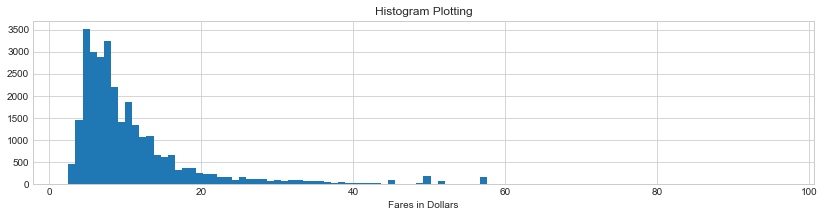

In [39]:
#Plotting the histogram

#we can notice here that there are are discrepancies between 40 and 60. This could mean something fixed

train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fares in Dollars')
plt.title('Histogram Plotting')

In [40]:
#Here we check to see if there is any missing data.

print(train.isnull().sum())
qwer=train.isnull().sum().sum()
de=test.isnull().sum().sum()
print(f"Number of Missing values in training set= {qwer} ")
print(f"Number of Missing values in testing set= {de}")

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64
Number of Missing values in training set= 0 
Number of Missing values in testing set= 0


# Data Visualization

In [41]:
import plotly
import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
target = train.fare_amount
data = [go.Histogram(x=target)]
layout = go.Layout(title = "Fare Histogram")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [42]:
pickuplocation = [go.Scattermapbox(
            lat= train['pickup_latitude'] ,
            lon= train['pickup_longitude'],
            customdata = train['key'],
            mode='markers',
            marker=dict(
                size= 5,
                color = 'gold',
                opacity = .9,
            ),
          )]
layoutpan = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=800,
                    height=700, title = " Customer Pickup Visualization in NYC")
figure = dict(data=pickuplocation, layout=layoutpan)
iplot(figure)

In [43]:
#Now we visualize the dropoff locations of customers in NYC


dropofflocation = [go.Scattermapbox(
            lat= train['dropoff_latitude'] ,
            lon= train['dropoff_longitude'],
            customdata = train['key'],
            mode='markers',
            marker=dict(
                size= 5,
                color = 'green',
                opacity = .9,
            ),
          )]
layoutpan = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=12,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=700, title = "Customer Dropoff Visualization in NYC")
figure = dict(data=dropofflocation, layout=layoutpan)
iplot(figure)


In [44]:
#Some time data using lambda functions
train['year'] = train.pickup_datetime.apply(lambda t: t.year)
train['weekday'] = train.pickup_datetime.apply(lambda t: t.weekday())
train['hour'] = train.pickup_datetime.apply(lambda t: t.hour)

In [45]:
#To calculate the distance in miles we use a formula called "HAVERSINE FORMULA"

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

count    29882.000000
mean         9.267311
std        192.129485
min          0.000000
25%          0.762219
50%          1.319149
75%          2.417799
max       5385.761038
Name: distance_miles, dtype: float64

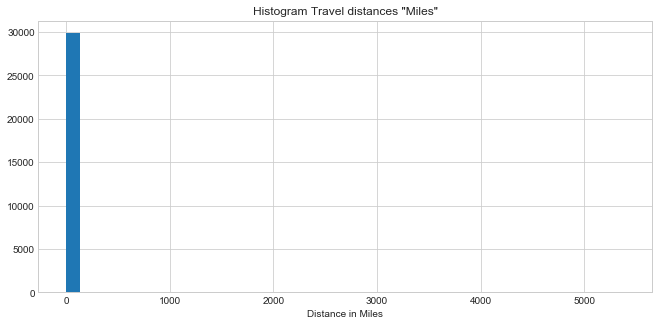

In [46]:
#We add a new distance column and from the diagram we can understand that all rides are short distance

train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

train.distance_miles.hist(bins=40, figsize=(11,5))
plt.xlabel('Distance in Miles')
plt.title('Histogram Travel distances "Miles"')
train.distance_miles.describe()


In [47]:
#We see an erroneous datapoint of 0 passenger count but the distance _miles and fare amount are high
train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
1                      9.889419    11.184761
2                      7.091700    12.218715
3                      4.127761    11.112620
4                     18.748279    11.821161
5                      7.380032    11.190636
6                     11.181855    12.123744

In [48]:
print("Average ride cost in USD/Mile : {}".format(train.fare_amount.sum()/train["distance_miles"].sum()))

Average ride cost in USD/Mile : 1.2266858679019745


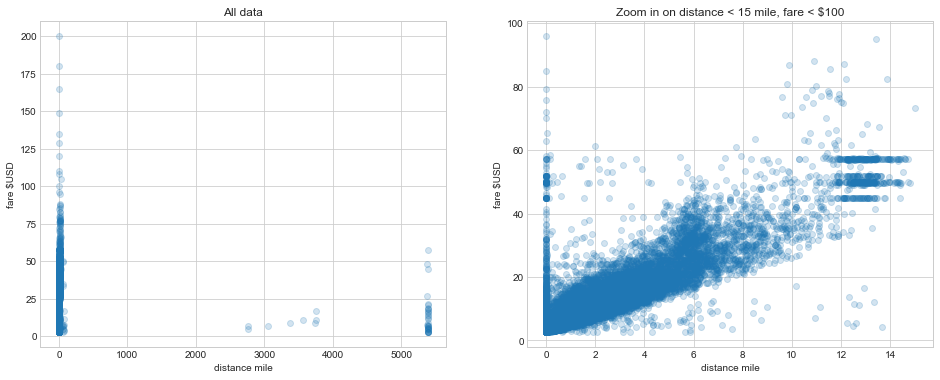

In [49]:
#Scatterplot of distance-Fare

fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(train.distance_miles, train.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (train.distance_miles < 15) & (train.fare_amount < 100)
axs[1].scatter(train[idx].distance_miles, train[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

# Model Implementation- Linear Regression

In [50]:
#Here we are defining the adataset

nyc = (-74.0063889, 40.7141667)
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                     test.dropoff_latitude, test.dropoff_longitude)
test['distance_to_center'] = distance(nyc[1], nyc[0], \
                                          test.dropoff_latitude, test.dropoff_longitude)
test['hour'] = test.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
test['year'] = test.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

In [51]:
train['distance_to_center'] = distance(nyc[1], nyc[0], train.pickup_latitude, train.pickup_longitude)
idx = (train.distance_to_center<15) & (train.passenger_count!=0)
features = ['year', 'hour', 'distance_miles', 'passenger_count']
X = train[idx][features].values
y = train[idx]['fare_amount'].values

In [52]:
#Checking the shape

X.shape, y.shape


((29257, 4), (29257,))

In [53]:
#Creatig the training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [54]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

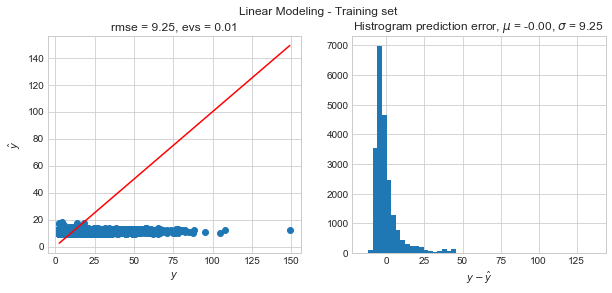

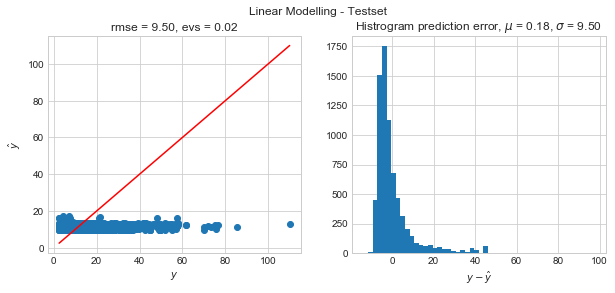

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Modeling - Training set')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Modelling - Testset')